### load CleanLab processed data

In [1]:
import pandas as pd
X_new = pd.read_csv('/content/sample_data/ASDC.csv', delimiter=',',header = None,index_col= 0)

# load numpy array from csv file
from numpy import loadtxt
import numpy as np
# load array
y_new = loadtxt('/content/sample_data/y_Cleaned.csv', delimiter=',')

In [2]:
X_new

,1,2,3,4,5,6,7,8,9,10,...,391,392,393,394,395,396,397,398,399,400
0,,,,,,,,,,,,,,,,,,,,,
MDFLI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
MFDL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
MDLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
LIVTQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
LIVT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAEER,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0
YPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
YPGIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [3]:
print(X_new.shape)
print(y_new.shape)
print(np.count_nonzero(y_new==0))
print(np.count_nonzero(y_new==1))

(1020, 400)
(1020,)
394
626


### Cross-validation for hyperparameters

In [4]:
import statistics
from sklearn.metrics import balanced_accuracy_score

In [5]:
# dataset splitting 
from sklearn.model_selection import train_test_split
X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=1111)

#### logistic regression

In [6]:
# logistic regresion non penality
from sklearn.linear_model import LogisticRegression
acc_cv_mean_collection=[]
C_para = [0.5]
from sklearn.model_selection import StratifiedKFold, KFold
for i in C_para:
    acc_cv_collection = []
    clf = LogisticRegression(penalty= 'none', max_iter = 2000)  # need to tune the hyperparameters
    skf = StratifiedKFold(n_splits=10)
    for train, test in skf.split(X_train_whole, y_train_whole):
        X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                     test.tolist(),
                                                                                                     axis=0), np.take(
            y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
        acc_cv_collection.append(acc_cv)
    acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
    print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

LogisticRegression(max_iter=2000, penalty='none') 0.684 0.072


In [7]:
# logistic regresion l1 penality
from sklearn.linear_model import LogisticRegression
acc_cv_mean_collection=[]
C_para = [0.5,1,1.5,2,2.5,4,6,8,13,14,15,16,20,30,40, 50,60,70, 80, 90 ,100,125]
from sklearn.model_selection import StratifiedKFold, KFold
for i in C_para:
    acc_cv_collection = []
    clf = LogisticRegression(penalty= 'l1', solver= 'saga', C=i, max_iter = 5000)  # need to tune the hyperparameters
    skf = StratifiedKFold(n_splits=10)
    for train, test in skf.split(X_train_whole, y_train_whole):
        X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                     test.tolist(),
                                                                                                     axis=0), np.take(
            y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
        acc_cv_collection.append(acc_cv)
    acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
    print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

LogisticRegression(C=0.5, max_iter=5000, penalty='l1', solver='saga') 0.542 0.022
LogisticRegression(C=1, max_iter=5000, penalty='l1', solver='saga') 0.601 0.042
LogisticRegression(C=1.5, max_iter=5000, penalty='l1', solver='saga') 0.635 0.04
LogisticRegression(C=2, max_iter=5000, penalty='l1', solver='saga') 0.654 0.042
LogisticRegression(C=2.5, max_iter=5000, penalty='l1', solver='saga') 0.658 0.036
LogisticRegression(C=4, max_iter=5000, penalty='l1', solver='saga') 0.688 0.061
LogisticRegression(C=6, max_iter=5000, penalty='l1', solver='saga') 0.703 0.062
LogisticRegression(C=8, max_iter=5000, penalty='l1', solver='saga') 0.71 0.061
LogisticRegression(C=13, max_iter=5000, penalty='l1', solver='saga') 0.72 0.049
LogisticRegression(C=14, max_iter=5000, penalty='l1', solver='saga') 0.717 0.047
LogisticRegression(C=15, max_iter=5000, penalty='l1', solver='saga') 0.711 0.042
LogisticRegression(C=16, max_iter=5000, penalty='l1', solver='saga') 0.71 0.046
LogisticRegression(C=20, max_iter=

In [8]:
# logistic regresion
from sklearn.linear_model import LogisticRegression
acc_cv_mean_collection=[]
C_para = [0.5,1,1.5,2,2.5,4,6,8,13,14,15,16,20,30,40, 50,60,70, 80, 90 ,100,125, 500, 1000,2000,4000,10000]
from sklearn.model_selection import StratifiedKFold, KFold
for i in C_para:
    acc_cv_collection = []
    clf = LogisticRegression(C=i, max_iter = 5000)  # need to tune the hyperparameters
    skf = StratifiedKFold(n_splits=10)
    for train, test in skf.split(X_train_whole, y_train_whole):
        X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                     test.tolist(),
                                                                                                     axis=0), np.take(
            y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
        acc_cv_collection.append(acc_cv)
    acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
    print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

LogisticRegression(C=0.5, max_iter=5000) 0.535 0.024
LogisticRegression(C=1, max_iter=5000) 0.584 0.032
LogisticRegression(C=1.5, max_iter=5000) 0.618 0.048
LogisticRegression(C=2, max_iter=5000) 0.638 0.046
LogisticRegression(C=2.5, max_iter=5000) 0.649 0.053
LogisticRegression(C=4, max_iter=5000) 0.665 0.049
LogisticRegression(C=6, max_iter=5000) 0.679 0.05
LogisticRegression(C=8, max_iter=5000) 0.689 0.057
LogisticRegression(C=13, max_iter=5000) 0.687 0.058
LogisticRegression(C=14, max_iter=5000) 0.686 0.053
LogisticRegression(C=15, max_iter=5000) 0.688 0.051
LogisticRegression(C=16, max_iter=5000) 0.692 0.047
LogisticRegression(C=20, max_iter=5000) 0.693 0.049
LogisticRegression(C=30, max_iter=5000) 0.699 0.053
LogisticRegression(C=40, max_iter=5000) 0.699 0.053
LogisticRegression(C=50, max_iter=5000) 0.699 0.05
LogisticRegression(C=60, max_iter=5000) 0.696 0.052
LogisticRegression(C=70, max_iter=5000) 0.694 0.051
LogisticRegression(C=80, max_iter=5000) 0.693 0.053
LogisticRegressi

#### random forest

In [9]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

acc_cv_mean_collection = []
n_estimatorsint = [80, 160, 320, 480, 640, 1280]
max_depthint = [1, 2, 3, 4]
max_features = ['log2', 'sqrt']

for i in n_estimatorsint:
    for j in max_depthint:
        for p in max_features:
            acc_cv_collection = []
            clf = RandomForestClassifier(n_estimators=i, max_depth=j, max_features=p)
            from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
            skf = StratifiedKFold(n_splits=10)
            for train, test in skf.split(X_train_whole, y_train_whole):
                X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                                test.tolist(),
                                                                                                                axis=0), np.take(
                    y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
                clf.fit(X_train, y_train)
                y_valid_pred = clf.predict(X_valid)
                acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
                acc_cv_collection.append(acc_cv)
            acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
            print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=80) 0.5 0.0
RandomForestClassifier(max_depth=1, max_features='sqrt', n_estimators=80) 0.503 0.007
RandomForestClassifier(max_depth=2, max_features='log2', n_estimators=80) 0.502 0.005
RandomForestClassifier(max_depth=2, max_features='sqrt', n_estimators=80) 0.554 0.028
RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=80) 0.531 0.022
RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=80) 0.594 0.053
RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=80) 0.557 0.025
RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=80) 0.631 0.062
RandomForestClassifier(max_depth=1, max_features='log2', n_estimators=160) 0.5 0.0
RandomForestClassifier(max_depth=1, max_features='sqrt', n_estimators=160) 0.503 0.007
RandomForestClassifier(max_depth=2, max_features='log2', n_estimators=160) 0.502 0.005
RandomForestClassifier(max_depth=2, max_features='sqrt', n_

#### KNN

In [10]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score

acc_cv_mean_collection = []
n_neighbors = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50, 60, 70, 80]
for i in n_neighbors:
    for j in weights:
        for k in algorithm:
            for p in leaf_size:
                acc_cv_collection = []
                clf = KNeighborsClassifier(n_neighbors=i, weights=j, algorithm=k,
                                           leaf_size=p)  # need to tune the hyperparameters
                from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
                skf = StratifiedKFold(n_splits=10)
                for train, test in skf.split(X_train_whole, y_train_whole):
                    X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                                test.tolist(),
                                                                                                                axis=0), np.take(
                        y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
                    clf.fit(X_train, y_train)
                    y_valid_pred = clf.predict(X_valid)
                    acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
                    # print(acc_cv)
                    acc_cv_collection.append(acc_cv)
                acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
                print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

KNeighborsClassifier(leaf_size=10, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=20, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=40, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=50, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=60, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=70, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(leaf_size=80, n_neighbors=2) 0.669 0.042
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=2) 0.669 0.044
KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, n_neighbors=2) 0.67 0.044
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2) 0.67 0.044
KNeighborsClassifier(algorithm='ball_tree', leaf_size=40, n_neighbors=2) 0.67 0.044
KNeighborsClassifier(algorithm='ball_tree', leaf_size=50, n_neighbors=2) 0.669 0.044
KNeighborsClassifier(algorithm='ball_tree', leaf_size=60, n_neighbors=2) 0.669 0.044
KNeighborsClassifier(algo

#### SVM

In [11]:
# LinearSVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score

acc_cv_mean_collection = []
C = [0.0001, 0.01, 0.1,  0.5, 1.1, 1.3, 10,20, 30, 40, 50,60, 70, 80, 90, 100, 300]
degree = [1]
tol = [1e-5]
for i in C:
    for k in degree:
        for p in tol:
            acc_cv_collection = []
            clf = LinearSVC(C=i, tol=p, max_iter= 80000)  # need to tune the hyperparameters
            from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
            skf = StratifiedKFold(n_splits=10)
            for train, test in skf.split(X_train_whole, y_train_whole):
                X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                            test.tolist(),
                                                                                                            axis=0), np.take(
                    y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
                clf.fit(X_train, y_train)
                y_valid_pred = clf.predict(X_valid)
                acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
                acc_cv_collection.append(acc_cv)
            acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
            print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

LinearSVC(C=0.0001, max_iter=80000, tol=1e-05) 0.5 0.0
LinearSVC(C=0.01, max_iter=80000, tol=1e-05) 0.5 0.0
LinearSVC(C=0.1, max_iter=80000, tol=1e-05) 0.567 0.025
LinearSVC(C=0.5, max_iter=80000, tol=1e-05) 0.667 0.047
LinearSVC(C=1.1, max_iter=80000, tol=1e-05) 0.684 0.054
LinearSVC(C=1.3, max_iter=80000, tol=1e-05) 0.683 0.055
LinearSVC(C=10, max_iter=80000, tol=1e-05) 0.702 0.051
LinearSVC(C=20, max_iter=80000, tol=1e-05) 0.705 0.062
LinearSVC(C=30, max_iter=80000, tol=1e-05) 0.698 0.064
LinearSVC(C=40, max_iter=80000, tol=1e-05) 0.693 0.067
LinearSVC(C=50, max_iter=80000, tol=1e-05) 0.691 0.065
LinearSVC(C=60, max_iter=80000, tol=1e-05) 0.689 0.058
LinearSVC(C=70, max_iter=80000, tol=1e-05) 0.69 0.063
LinearSVC(C=80, max_iter=80000, tol=1e-05) 0.691 0.067
LinearSVC(C=90, max_iter=80000, tol=1e-05) 0.697 0.065
LinearSVC(C=100, max_iter=80000, tol=1e-05) 0.699 0.065
LinearSVC(C=300, max_iter=80000, tol=1e-05) 0.686 0.057


In [12]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score

acc_cv_mean_collection = []
C = [0.001, 0.01, 0.1,  0.5, 1.1, 1.3, 5, 10, 30, 50, 100, 300]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [1, 3, 5, 7, 9]
tol = [1e-5]
for i in C:
    for j in kernel:
        for k in degree:
            for p in tol:
                acc_cv_collection = []
                clf = SVC(C=i, kernel=j, degree=k)  # need to tune the hyperparameters
                from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
                skf = StratifiedKFold(n_splits=10)
                for train, test in skf.split(X_train_whole, y_train_whole):
                    X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                                test.tolist(),
                                                                                                                axis=0), np.take(
                        y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
                    clf.fit(X_train, y_train)
                    y_valid_pred = clf.predict(X_valid)
                    acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
                    acc_cv_collection.append(acc_cv)
                acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
                print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

SVC(C=0.001, degree=1, kernel='linear') 0.5 0.0
SVC(C=0.001, kernel='linear') 0.5 0.0
SVC(C=0.001, degree=5, kernel='linear') 0.5 0.0
SVC(C=0.001, degree=7, kernel='linear') 0.5 0.0
SVC(C=0.001, degree=9, kernel='linear') 0.5 0.0
SVC(C=0.001, degree=1, kernel='poly') 0.5 0.0
SVC(C=0.001, kernel='poly') 0.5 0.0
SVC(C=0.001, degree=5, kernel='poly') 0.5 0.0
SVC(C=0.001, degree=7, kernel='poly') 0.5 0.0
SVC(C=0.001, degree=9, kernel='poly') 0.502 0.005
SVC(C=0.001, degree=1) 0.5 0.0
SVC(C=0.001) 0.5 0.0
SVC(C=0.001, degree=5) 0.5 0.0
SVC(C=0.001, degree=7) 0.5 0.0
SVC(C=0.001, degree=9) 0.5 0.0
SVC(C=0.001, degree=1, kernel='sigmoid') 0.5 0.0
SVC(C=0.001, kernel='sigmoid') 0.5 0.0
SVC(C=0.001, degree=5, kernel='sigmoid') 0.5 0.0
SVC(C=0.001, degree=7, kernel='sigmoid') 0.5 0.0
SVC(C=0.001, degree=9, kernel='sigmoid') 0.5 0.0
SVC(C=0.01, degree=1, kernel='linear') 0.5 0.0
SVC(C=0.01, kernel='linear') 0.5 0.0
SVC(C=0.01, degree=5, kernel='linear') 0.5 0.0
SVC(C=0.01, degree=7, kernel='linea

#### MLP

In [13]:
# MLP one layer
from sklearn.neural_network import MLPClassifier

hidden_layers_1 = [1,2,3,4,6,8,12,16, 18, 20, 22, 24,26,28,32, 64, 128, 240, 320, 640,1280]

acc_cv_mean_collection = []
for i in hidden_layers_1:
    acc_cv_collection = []
    clf = MLPClassifier(hidden_layer_sizes=(i,),early_stopping= True,n_iter_no_change= 40, max_iter = 3000)  # need to tune the hyperparameters
    from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
    skf = StratifiedKFold(n_splits=10)
    for train, test in skf.split(X_train_whole, y_train_whole):
        X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                     test.tolist(),
                                                                                                     axis=0), np.take(
            y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        y_train_pred = clf.predict(X_train)
        # print(balanced_accuracy_score(y_train, y_train_pred))
        acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
        acc_cv_collection.append(acc_cv)
    acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
    print(clf,round(statistics.mean(acc_cv_collection),3),  round(statistics.stdev(acc_cv_collection),3))

MLPClassifier(early_stopping=True, hidden_layer_sizes=(1,), max_iter=3000,
              n_iter_no_change=40) 0.525 0.08
MLPClassifier(early_stopping=True, hidden_layer_sizes=(2,), max_iter=3000,
              n_iter_no_change=40) 0.522 0.069
MLPClassifier(early_stopping=True, hidden_layer_sizes=(3,), max_iter=3000,
              n_iter_no_change=40) 0.514 0.045
MLPClassifier(early_stopping=True, hidden_layer_sizes=(4,), max_iter=3000,
              n_iter_no_change=40) 0.604 0.099
MLPClassifier(early_stopping=True, hidden_layer_sizes=(6,), max_iter=3000,
              n_iter_no_change=40) 0.558 0.083
MLPClassifier(early_stopping=True, hidden_layer_sizes=(8,), max_iter=3000,
              n_iter_no_change=40) 0.629 0.128
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12,), max_iter=3000,
              n_iter_no_change=40) 0.628 0.081
MLPClassifier(early_stopping=True, hidden_layer_sizes=(16,), max_iter=3000,
              n_iter_no_change=40) 0.652 0.051
MLPClassifier(early_sto

In [14]:
# MLP two layer
from sklearn.neural_network import MLPClassifier

hidden_layers_1 = [12,24,32,64,128,256,320,640,1280]
hidden_layers_2 = [2,8,12,24,32,64,128,256]
acc_cv_mean_collection = []
for i in hidden_layers_1:
    for j in hidden_layers_2:
        acc_cv_collection = []
        clf = MLPClassifier(hidden_layer_sizes=(i,j),early_stopping = True,n_iter_no_change= 40,  max_iter = 3000)  # need to tune the hyperparameters
        from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
        skf = StratifiedKFold(n_splits=10)
        for train, test in skf.split(X_train_whole, y_train_whole):
            X_train, X_valid, y_train, y_valid = np.take(X_train_whole, train.tolist(), axis=0), np.take(X_train_whole,
                                                                                                                    test.tolist(),
                                                                                                                    axis=0), np.take(
            y_train_whole, train.tolist(), axis=0), np.take(y_train_whole, test.tolist(), axis=0)
            clf.fit(X_train, y_train)
            y_valid_pred = clf.predict(X_valid)
            acc_cv = balanced_accuracy_score(y_valid, y_valid_pred)
            acc_cv_collection.append(acc_cv)
        acc_cv_mean_collection.append(round(statistics.mean(acc_cv_collection),3))
        print(clf,round(statistics.mean(acc_cv_collection),3), round(statistics.stdev(acc_cv_collection),3))

MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 2), max_iter=3000,
              n_iter_no_change=40) 0.581 0.122
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 8), max_iter=3000,
              n_iter_no_change=40) 0.691 0.066
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 12), max_iter=3000,
              n_iter_no_change=40) 0.692 0.067
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 24), max_iter=3000,
              n_iter_no_change=40) 0.683 0.059
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 32), max_iter=3000,
              n_iter_no_change=40) 0.668 0.082
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 64), max_iter=3000,
              n_iter_no_change=40) 0.71 0.07
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 128), max_iter=3000,
              n_iter_no_change=40) 0.707 0.047
MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 256), max_iter=3000,
              n_iter_no_change=40) 0.721 

### t-SNE graph 
change the perplexity 

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


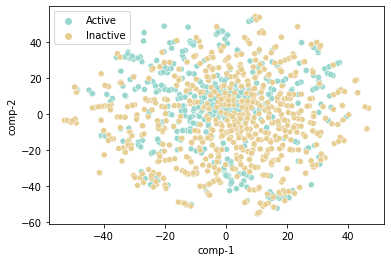

In [15]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=0, perplexity= 25, learning_rate='auto',n_iter = 5000,random_state=123)
z = tsne.fit_transform(X_new) 
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
y_new_label=[]
for i in y_new:
    if i == 0:
        y_new_label.append('Active')
    if i == 1:
        y_new_label.append('Inactive')
df["y"] = y_new_label
graph = sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=y_new_label,
                palette='BrBG_r', legend='full')
graph_for_output = graph.get_figure()
graph_for_output.savefig('1020 after CleanLab.png', dpi=600)
df.to_excel('1020 after CleanLab.xlsx')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


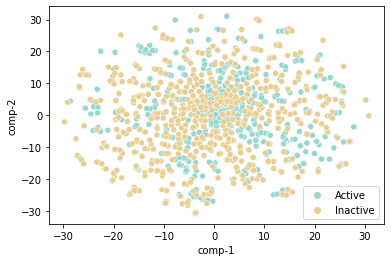

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=0, perplexity= 50, learning_rate='auto',n_iter = 5000,random_state=123)
z = tsne.fit_transform(X_new) 
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
y_new_label=[]
for i in y_new:
    if i == 0:
        y_new_label.append('Active')
    if i == 1:
        y_new_label.append('Inactive')
df["y"] = y_new_label
graph = sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=y_new_label,
                palette='BrBG_r', legend='full')
graph_for_output = graph.get_figure()
graph_for_output.savefig('1.AHT_t-SNE_1and2.png', dpi=300)
df.to_excel('1.AHT_t-SNE.xlsx')

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


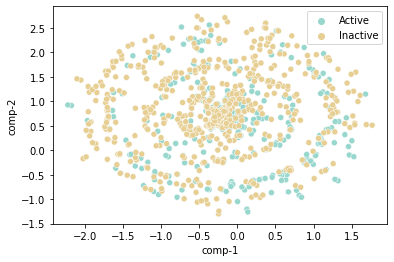

In [17]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=0, perplexity= 500, learning_rate='auto',n_iter = 5000,random_state=123)
z = tsne.fit_transform(X_new) 
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
y_new_label=[]
for i in y_new:
    if i == 0:
        y_new_label.append('Active')
    if i == 1:
        y_new_label.append('Inactive')
df["y"] = y_new_label
graph = sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=y_new_label,
                palette='BrBG_r', legend='full')
graph_for_output = graph.get_figure()
graph_for_output.savefig('1.AHT_t-SNE_1and2.png', dpi=300)
df.to_excel('1.AHT_t-SNE.xlsx')

### model development with best hyperparameters

In [24]:
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

In [26]:
# logistic regression for final test 

# result collection list
ACC_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=i)
    # clf = LogisticRegression(penalty= 'none', C=i, max_iter = 2000)
    clf = LogisticRegression(C=13, max_iter=5000, penalty='l1', solver='saga')
    clf.fit(X_train_whole, y_train_whole)# fitting model 
    y_pred = clf.predict(X_ind_test)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
# print(round(mean(AUC_collecton),3),'±',round(stdev(AUC_collecton),3))

0.715 ± 0.031
0.646 ± 0.051
0.785 ± 0.043
0.43 ± 0.064


In [29]:
# random forest
from sklearn.ensemble import RandomForestClassifier
# result collection list
ACC_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=i)
    clf = RandomForestClassifier(max_depth=4, n_estimators=160)
    clf.fit(X_train_whole,y_train_whole)# fitting model 
    y_pred = clf.predict(X_ind_test)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
# print(round(mean(AUC_collecton),3),'±',round(stdev(AUC_collecton),3))



0.764 ± 0.038
0.84 ± 0.072
0.689 ± 0.038
0.352 ± 0.052


In [28]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# result collection list
ACC_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=i)
    clf = KNeighborsClassifier(algorithm='brute', leaf_size=20, 
                               n_neighbors=43, weights='distance') 
    clf.fit(X_train_whole,y_train_whole)# fitting model 
    y_pred = clf.predict(X_ind_test)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))

print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
# print(round(mean(AUC_collecton),3),'±',round(stdev(AUC_collecton),3))



0.681 ± 0.03
0.526 ± 0.069
0.836 ± 0.053
0.363 ± 0.064


In [30]:
# SVM
from sklearn.svm import SVC
# result collection list
ACC_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=i)
    clf = SVC(C=5, degree=5)
    clf.fit(X_train_whole,y_train_whole)# fitting model 
    y_pred = clf.predict(X_ind_test)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
# print(round(mean(AUC_collecton),3),'±',round(stdev(AUC_collecton),3))



0.748 ± 0.013
0.693 ± 0.043
0.802 ± 0.03
0.489 ± 0.027


In [31]:
# MLP one layer
from sklearn.neural_network import MLPClassifier
# result collection list
ACC_collecton = []
BACC_collecton = []
Sn_collecton = []
Sp_collecton = []
MCC_collecton = []
for i in range(10):
    # dataset splitting
    X_train_whole, X_ind_test, y_train_whole, y_ind_test =  train_test_split( X_new, y_new, test_size=0.2, random_state=i)
    clf = MLPClassifier(early_stopping=True, hidden_layer_sizes=(1280, 256), 
                        max_iter=3000, n_iter_no_change=40) 
    clf.fit(X_train_whole,y_train_whole)# fitting model 
    y_pred = clf.predict(X_ind_test)    # predict results
    y_true = y_ind_test                 # asign values for confusiong matrix calculation
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred).ravel() # shape [ [True-Positive, False-positive], [False-negative, True-negative] ]
    Sn_collecton.append(TP/(TP+FN))
    Sp_collecton.append(TN/(TN+FP))
    MCC = (TP*TN-FP*FN)/math.pow(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)),0.5)
    MCC_collecton.append(MCC)
    BACC_collecton.append(0.5*TP/(TP+FN)+0.5*TN/(TN+FP))
    
print(round(statistics.mean(BACC_collecton),3),'±',round(statistics.stdev(BACC_collecton),3))
print(round(statistics.mean(Sn_collecton),3),'±',round(statistics.stdev(Sn_collecton),3))
print(round(statistics.mean(Sp_collecton),3),'±',round(statistics.stdev(Sp_collecton),3))
print(round(statistics.mean(MCC_collecton),3),'±',round(statistics.stdev(MCC_collecton),3))
# print(round(mean(AUC_collecton),3),'±',round(stdev(AUC_collecton),3))



0.746 ± 0.025
0.679 ± 0.076
0.813 ± 0.063
0.486 ± 0.056
